# Exercise 6: Support Vector Machine 
This exercise will help you:
* Gain intuition of how SVM work
* How to use gaussian kernel with SVMs
* Build spam classifier using SVM

# 1. Support Vector Machine
In the first part of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd

from pandas import DataFrame as dframe

## 1.1 Example Dataset 1
We will begin by with a 2D example dataset which can be separated by a linear boundary

In [2]:
# Load from ex6data1.mat
data1 = sio.loadmat('ex6data1.mat')

In [3]:
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
# Store variable inside data to respective variable
X = data1['X']
y = data1['y']

In [5]:
X.shape, y.shape

((51, 2), (51, 1))

In [6]:
def plotData(X, y):
    '''
    PLOTDATA Plots the data points X and y into a new figure 
       PLOTDATA(x,y) plots the data points with + for the positive examples
       and o for the negative examples. X is assumed to be a Mx2 matrix.
    
    Note: This was slightly modified such that it expects y = 1 or y = 0
    '''
    # Find index where y == 1 and y == 0
    bindx_0 = (y.flatten()==0) # bindex stands for boolean index
    
    ind0 = np.arange(len(y))[bindx_0]
    ind1 = np.arange(len(y))[~bindx_0]
    
    # Plotting
    plt.figure(figsize=(7, 5))
    plt.scatter(X[ind0, 0], X[ind0, 1], c='y', s = 70, marker='o', label='Negative', edgecolors='black')
    plt.scatter(X[ind1, 0], X[ind1, 1], c='k', s = 70, marker='x', label='Positive', lw=2)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('y', fontsize=12)

    plt.legend()

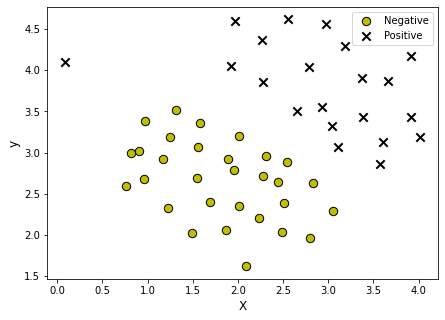

In [7]:
plotData(X, y)

In [8]:
# ==================== Part 2: Training Linear SVM ====================
from sklearn import svm

In [9]:
# This function is specially built for this exercise to handle either linear or custom gaussian kernel
def svmTrain(X, y, kernel, C=1, sigma=0.1):
    
    if kernel == 'linear':
        clf = svm.SVC(C=C, kernel='linear')
        model = clf.fit(X, y.ravel())
        
            
    elif kernel == 'gaussian':
        clf = svm.SVC(C=C, kernel='precomputed')
        gram = gaussianKernelGramMatrix(X, X, sigma)
        model = clf.fit(gram, y.ravel())
    
    
    return model

In [10]:
model = svmTrain(X, y, kernel='linear')

In [11]:
def visualizeBoundaryLinear(X, y, model):
    w = (model.coef_).ravel()
    b = model.intercept_
    
    xp = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
    yp = - (w[0]*xp + b)/w[1]
    plotData(X, y)
    plt.plot(xp, yp)

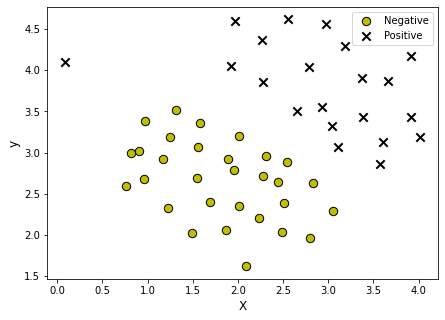

In [12]:
plotData(X, y)

In this part of the exercise, you will try using **different values of the C parameter** with SVMs. Informally, the C parameter is a positive value that **controls the penalty** for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

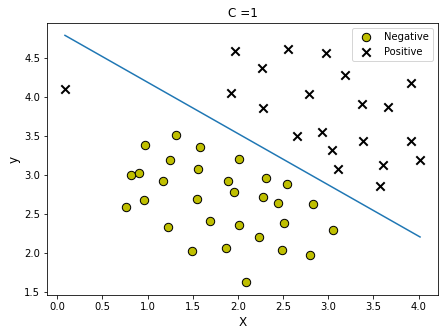

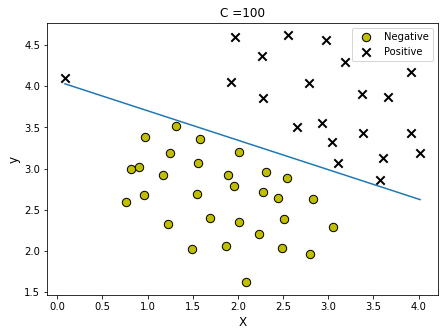

In [13]:
# Train SVM classifier with different number of C
C_values = [1, 100]

for C_val in C_values:
    model = svmTrain(X, y, kernel='linear', C=C_val)
    visualizeBoundaryLinear(X, y, model)
    plt.title('C =' + str(C_val))

## 1.2 SVM with Gaussian Kernels
In this part of the exercise, you will be using SVMs to do non-linear classification. 

### 1.2.1 Gaussian Kernel
You can think of the Gaussian kernel as a similarity function that measures the "distance" between a pair of examples,
$(x^{(i)}, x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.

![gaussian-kernel](./img/gaussian-kernel.jpg)

In [14]:
# =============== Part 3: Implementing Gaussian Kernel ===============
# Implement the gaussian kernel to use with the SVM
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

In [15]:
def gaussianKernel(x1, x2, sigma):
    '''
    RBFKERNEL returns a radial basis function kernel between x1 and x2
       sim = gaussianKernel(x1, x2) returns a gaussian kernel between x1 and x2
       and returns the value in sim
    '''
    # To make sure x1 and x2 are in 1-D array
    x1 = x1.ravel()
    x2 = x2.ravel()
    
    # Need to return this variable (similarity) correctly
    sim = 0
    
    sim = np.exp((-np.sum((x1 - x2)**2)/(2*sigma**2)))

    return sim

In [16]:
# Measures the 'distance/similarity' between two values in x1 and x2
sim = gaussianKernel(x1, x2, sigma)

In [17]:
print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = %d, %.7f' %(sigma, sim))
print('for sigma = 2, this value should be about 0.324652')

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2, 0.3246525
for sigma = 2, this value should be about 0.324652


### 1.2.2 Example Dataset 2

In [18]:
# =============== Part 4: Visualizing Dataset 2 ================
# Store variable inside data to respective variable
data2 = sio.loadmat('ex6data2.mat')

In [19]:
X = data2['X']
y = data2['y']

In [20]:
X.shape, y.shape

((863, 2), (863, 1))

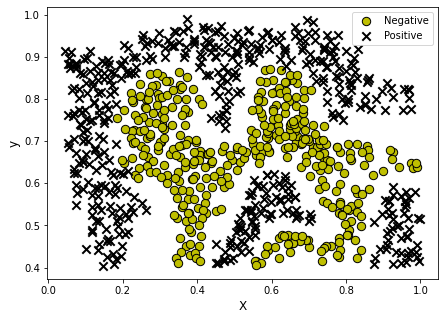

In [21]:
plotData(X, y)

In [22]:
# ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
# SVM Parameters
C = 1
sigma = 0.1

In [23]:
# In order to use custom kernel such as gaussiankernel
# a gram matrix is neet to computed as input to svm.SVC.fit

def gaussianKernelGramMatrix(X1, X2, sigma):
    """(Pre)calculates Gram Matrix K"""

    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            gram_matrix[i, j] = gaussianKernel(x1, x2, sigma)
    
    return gram_matrix

In [24]:
model = svmTrain(X, y, kernel='gaussian')

In [25]:
def visualizeBoundary(X, y, model):
    x1plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    x2plot = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
    (X1, X2) = np.meshgrid(x1plot, x2plot)

    vals = np.zeros(X1.shape)

    for i in range(len(X1)):    
        this_X = np.hstack([X1[:, [i]], X2[:, [i]]])
        vals[:, i] = model.predict(gaussianKernelGramMatrix(this_X, X, sigma))
        
    plotData(X, y)
    plt.contour(X1, X2, vals, [0.5], colors='b')

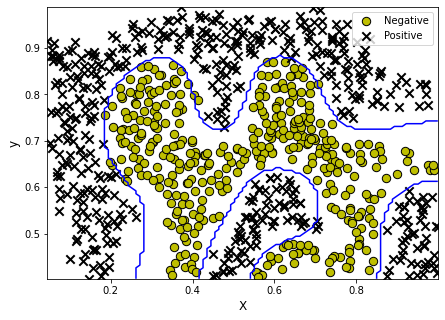

In [26]:
visualizeBoundary(X, y, model)

### 1.2.3 Example Dataset 3

In [27]:
# =============== Part 6: Visualizing Dataset 3 ================
data3 = sio.loadmat('ex6data3')

In [28]:
X = data3['X']
y = data3['y']
Xval = data3['Xval']
yval = data3['yval']

In [29]:
X.shape, y.shape, Xval.shape, yval.shape

((211, 2), (211, 1), (200, 2), (200, 1))

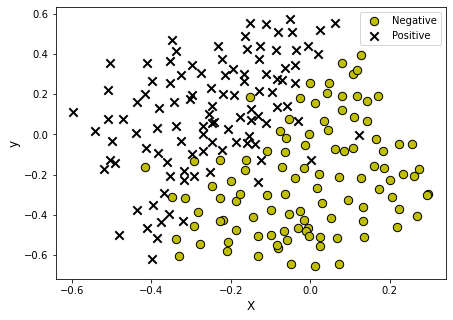

In [30]:
plotData(X, y)

In [31]:
# ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========
def dataset3Params(X, y, Xval, yval):
    # DATASET3PARAMS returns your choice of C and sigma for Part 3 of the exercise
    # where you select the optimal (C, sigma) learning parameters to use for SVM
    # with RBF kernel
    #    [C, sigma] = DATASET3PARAMS(X, y, Xval, yval) returns your choice of C and 
    #    sigma. You should complete this function to return the optimal C and 
    #    sigma based on a cross-validation set.
    
    
    # Initialize variables
    result = np.zeros(3)
    
    # Various C and sigma values
    C_temp = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma_temp = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    
    # Initialize variable to store result
    result = np.zeros(3)
    
    # Length of C_temp and sigma_temp to iterate
    m = len(C_temp);
    n = len(sigma_temp);
    
    # Iterate over all C and sigma values
    for i in range(m):
        for j in range(n):
            C = C_temp[i]
            σ = sigma_temp[j]

            model = svmTrain(X, y, kernel='gaussian', C=C, sigma=σ)
            ypred = model.predict(gaussianKernelGramMatrix(Xval, X, σ))
            err = np.mean(ypred!=yval.ravel())
            
            # Append current C, sigma, and error vertically
            result = np.vstack([result, np.c_[C, σ, err]])
    
    # Delete first row as it only contains row of zeros
    result = np.delete(result, 0, 0)
    
    # Find minimum value of error, exrtact its index to get best C and sigma values
    min_val = np.min(result[:, 2])
    min_idx = np.where(result[:, 2]==min_val)[0][0]

    C = result[min_idx, 0]
    sigma = result[min_idx, 1]
    
    return C, sigma

In [32]:
C, sigma = dataset3Params(X, y, Xval, yval)

In [33]:
model= svmTrain(X, y, kernel='gaussian', C=C, sigma=sigma)

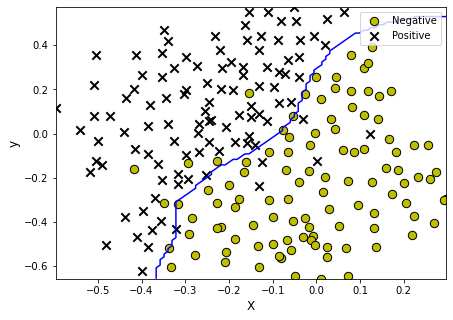

In [34]:
visualizeBoundary(X, y, model)

## Credit
https://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel